In [48]:
import numpy as np
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Datasets\deliveries.csv")
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [5]:
df1 = pd.read_csv(r"D:\Datasets\matches.csv")
df1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


## 1. Which of the following is the right way to merge 2 datasets for getting better insights from the data

In [6]:
df3 = pd.merge(df, df1, left_on='match_id', right_on='id', how='inner')
df3

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## 2. The column which has the most missing values according to the data is:


In [ ]:
# checking percentage of Null Values.

In [199]:
df1.isnull().sum()/len(df1)*100

id                  0.000000
season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

## 3. City which hosted most number of seasons according to the data is:


In [17]:
df3['city'].value_counts() #checking value counts of city

Mumbai            24302
Kolkata           17991
Delhi             17305
Hyderabad         15215
Bangalore         15155
Chennai           13895
Jaipur            11158
Chandigarh        10840
Pune               9119
Durban             3643
Bengaluru          3248
Visakhapatnam      3037
Ahmedabad          2893
Centurion          2866
Mohali             2431
Rajkot             2381
Dharamsala         2159
Indore             1965
Johannesburg       1940
Cuttack            1695
Port Elizabeth     1677
Ranchi             1671
Abu Dhabi          1624
Cape Town          1539
Sharjah            1439
Raipur             1431
Kochi              1155
Kanpur              921
Nagpur              742
Kimberley           726
East London         715
Bloemfontein        500
Name: city, dtype: int64

## 4. Which year has the most number of matches played?


In [41]:
df3['season'].value_counts() # checking value counts of season.

2013    18177
2012    17767
2011    17013
2010    14498
2019    14328
2014    14300
2018    14290
2016    14096
2017    13862
2015    13652
2009    13606
2008    13489
Name: season, dtype: int64

## 5. Maximum wins by Mumbai Indians in 2011 are


In [39]:
pd.crosstab(df1['winner'],df1['season'])

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
winner,,,,,,,,,,,,
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0,11,10
Deccan Chargers,2,9,8,6,4,0,0,0,0,0,0,0
Delhi Capitals,0,0,0,0,0,0,0,0,0,0,0,10
Delhi Daredevils,7,10,7,4,11,3,2,5,7,6,5,0
Gujarat Lions,0,0,0,0,0,0,0,0,9,4,0,0
Kings XI Punjab,10,7,4,7,8,8,12,3,4,7,6,6
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0,0,0
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9,9,6
Mumbai Indians,7,5,11,10,10,13,7,10,7,12,6,11


## 6. For 'toss_decision' feature what kind of plot is suitable?
## 7.  What is the percentage of getting bat and field in feature 'toss_descision'?


In [42]:
x = pd.DataFrame(df1["toss_decision"].value_counts())
x

,toss_decision
field,463
bat,293


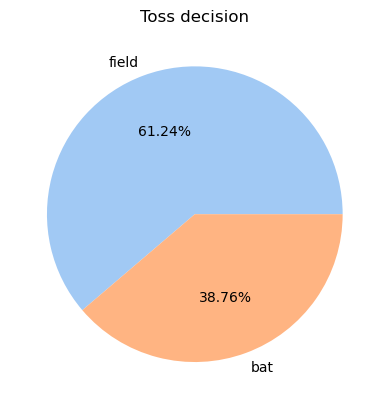

In [50]:
colors = sns.color_palette('pastel')
plt.pie(x['toss_decision'], labels = x.index, colors=colors, autopct="%.2f%%" )
plt.title('Toss decision')
plt.show()

## 8.  Which statement holds true

In [65]:
x = df1.groupby(['toss_decision', ])[['toss_winner', 'winner', 'season' ]].value_counts()

toss_decision  toss_winner          winner               season
bat            Mumbai Indians       Mumbai Indians       2013      8
               Chennai Super Kings  Chennai Super Kings  2011      6
                                                         2013      5
                                                         2010      5
               Mumbai Indians       Mumbai Indians       2010      4
                                                                  ..
field          Deccan Chargers      Delhi Daredevils     2009      1
                                                         2008      1
                                    Deccan Chargers      2011      1
                                    Chennai Super Kings  2012      1
                                    Kings XI Punjab      2012      1
Length: 479, dtype: int64

## 9. In which years where taking batting second have won more number of matches?

In [71]:
df1.groupby(['toss_decision', 'season'])[['winner' ]].count()

winner
toss_decision season        
bat           2008        26
              2009        35
              2010        39
              2011        24
              2012        37
              2013        45
              2014        19
              2015        25
              2016        11
              2017        11
              2018        10
              2019        10
field         2008        32
              2009        22
              2010        21
              2011        48
              2012        37
              2013        31
              2014        41
              2015        32
              2016        49
              2017        48
              2018        50
              2019        49

## 10. To plot the most consistent batsmen among top 10 run getters, what plotting technique we use?

In [96]:
x = pd.DataFrame(df.groupby(by='batsman')['batsman_runs'].sum())
x

,batsman_runs
batsman,
A Ashish Reddy,280
A Chandila,4
A Chopra,53
A Choudhary,25
A Dananjaya,4
...,...
YV Takawale,192
Yashpal Singh,47
Younis Khan,3


In [100]:
y = x.sort_values(by='batsman_runs', ascending=False).head(10)


In [101]:
y

,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4428


In [108]:
y['batsman_runs']

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

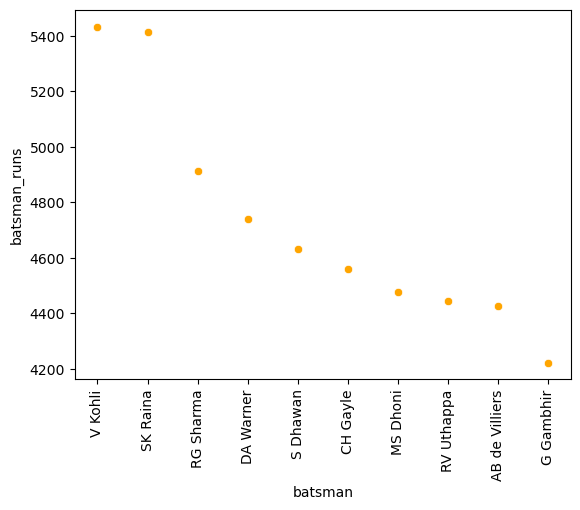

In [111]:
sns.scatterplot(x=y.index,y=y["batsman_runs"], color = 'orange')
plt.xticks(rotation = 90)
plt.show()

## 11. In 2019 which batsman scored highest number of runs by hitting 6's and 4's?

In [133]:
filtered_df = df3[(df3['season'] == 2019) & (df3['batsman_runs'].isin([4, 6]))]
result_df = filtered_df.groupby(['batsman', 'season'])['batsman_runs'].sum().reset_index()
result_df.sort_values(by='batsman_runs', ascending=False).head(10)

,batsman,season,batsman_runs
4,AD Russell,2019,438
18,CH Gayle,2019,392
22,DA Warner,2019,358
44,KL Rahul,2019,350
70,Q de Kock,2019,334
83,S Dhawan,2019,326
79,RR Pant,2019,310
35,J Bairstow,2019,308
31,HH Pandya,2019,296
97,SR Watson,2019,288


## 12. Most number of wickets taken by a bowler is


In [136]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [140]:
filterd = df[df['dismissal_kind'].isin(['caught', 'bowled',  'lbw', 'caught and bowled',
       'stumped'])]
filterd

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178977,11415,2,Chennai Super Kings,Mumbai Indians,4,6,F du Plessis,SR Watson,KH Pandya,0,...,0,0,0,0,0,0,0,F du Plessis,stumped,Q de Kock
179012,11415,2,Chennai Super Kings,Mumbai Indians,10,2,SK Raina,SR Watson,RD Chahar,0,...,0,0,0,0,0,0,0,SK Raina,lbw,NaN
179019,11415,2,Chennai Super Kings,Mumbai Indians,11,3,AT Rayudu,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,AT Rayudu,caught,Q de Kock
179067,11415,2,Chennai Super Kings,Mumbai Indians,19,2,DJ Bravo,SR Watson,JJ Bumrah,0,...,0,0,0,0,0,0,0,DJ Bravo,caught,Q de Kock


In [150]:
result = pd.DataFrame(filterd.groupby('bowler')['dismissal_kind'].count().reset_index())
result.sort_values(by='dismissal_kind', ascending=False).head(10)


,bowler,dismissal_kind
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,149
227,PP Chawla,149
82,DJ Bravo,147
46,B Kumar,133
232,R Ashwin,125
296,SP Narine,122
326,UT Yadav,119
244,RA Jadeja,108


## 13.  What is the strike rate of Kohli in 2016


In [153]:
filtered_df = df3[(df3['season'] == 2016) & (df3['batsman']== 'V Kohli')]
filtered_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
137017,580,1,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,V Kohli,CH Gayle,A Nehra,0,...,normal,0,Royal Challengers Bangalore,45,0,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VK Sharma,NaN
137018,580,1,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,V Kohli,CH Gayle,A Nehra,0,...,normal,0,Royal Challengers Bangalore,45,0,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VK Sharma,NaN
137019,580,1,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,V Kohli,CH Gayle,A Nehra,0,...,normal,0,Royal Challengers Bangalore,45,0,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VK Sharma,NaN
137020,580,1,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,V Kohli,CH Gayle,A Nehra,0,...,normal,0,Royal Challengers Bangalore,45,0,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VK Sharma,NaN
137026,580,1,Royal Challengers Bangalore,Sunrisers Hyderabad,2,6,V Kohli,AB de Villiers,B Kumar,0,...,normal,0,Royal Challengers Bangalore,45,0,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VK Sharma,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150410,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,12,5,V Kohli,AB de Villiers,Bipul Sharma,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150413,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,2,V Kohli,AB de Villiers,BB Sran,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150414,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,3,V Kohli,AB de Villiers,BB Sran,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150415,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,4,V Kohli,AB de Villiers,BB Sran,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [ ]:
# calculating strike rate

In [160]:
filtered_df['batsman_runs'].sum()/filtered_df['ball'].count()*100

148.54961832061068

## 14.  Bowlers with maximum number of extras:

In [163]:
result = pd.DataFrame(df.groupby(by='bowler')['extra_runs'].sum())
result


,extra_runs
bowler,
A Ashish Reddy,14
A Chandila,3
A Choudhary,7
A Dananjaya,1
A Flintoff,1
...,...
YA Abdulla,17
YK Pathan,71
YS Chahal,116


In [164]:
result.sort_values(by='extra_runs', ascending=False).head()

,extra_runs
bowler,
SL Malinga,293
P Kumar,236
UT Yadav,219
DJ Bravo,201
B Kumar,197


## 15. Which venue has hosted most number of IPL matches?

In [166]:
df1['venue'].value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

## 16. In 2017 when sunrisers hyderabad clashed against Royal Challengers Bangalore which team player won player of the match?

In [167]:
filtered_df = df1[(df1['season'] == 2017) & (df1['team1']== 'Sunrisers Hyderabad') & (df1['team2']== 'Royal Challengers Bangalore')]

In [168]:
filtered_df.groupby(['season','team1','team2'])['player_of_match'].unique()

season  team1                team2                      
2017    Sunrisers Hyderabad  Royal Challengers Bangalore    [Yuvraj Singh]
Name: player_of_match, dtype: object

## 17. Across seasons who are the top three batsman's with most number of run out?

In [176]:
filtered_df = df[df['dismissal_kind'].isin(['run out'])]

In [174]:
result = pd.DataFrame(filtered_df.groupby(by='batsman')['dismissal_kind'].count())
result.sort_values(by='dismissal_kind', ascending=False).head()


,dismissal_kind
batsman,
MS Dhoni,21
RG Sharma,17
KD Karthik,16
G Gambhir,15
V Kohli,15


## 18. What are the total runs scored by V Kohli when the bowler was JJ Burmah?

In [200]:
filtered_df= df3[(df3['batsman'] == 'V Kohli') & (df3['bowler']== 'JJ Bumrah') ]

In [201]:
filtered_df.groupby(['batsman','bowler'])['batsman_runs'].sum()

batsman  bowler   
V Kohli  JJ Bumrah    112
Name: batsman_runs, dtype: int64

## 19. Across all seasons which player was dismissed the maximum number of times via caught and bowled

In [187]:
filtered_df= df3[df3['dismissal_kind']=='caught and bowled']

In [192]:
result = pd.DataFrame(df3.groupby(by='player_dismissed')['dismissal_kind'].count())
result.sort_values(by='dismissal_kind', ascending=False).head()

,dismissal_kind
player_dismissed,
SK Raina,162
RG Sharma,155
RV Uthappa,153
V Kohli,143
S Dhawan,137


## 20. which player has the highest hard-hitting ability?


In [196]:
filtered_df = df3[df3['batsman_runs'].isin([4, 6])]
result_df = filtered_df.groupby(by='batsman')['batsman_runs'].sum().reset_index()
result_df.sort_values(by='batsman_runs', ascending=False).head(10)

,batsman,batsman_runs
79,CH Gayle,3466
353,SK Raina,3150
401,V Kohli,3074
93,DA Warner,2922
305,RG Sharma,2888
21,AB de Villiers,2712
327,S Dhawan,2680
320,RV Uthappa,2680
367,SR Watson,2438
247,MS Dhoni,2430


In [198]:
filtered_df = df3[df3['batsman_runs'].isin([6])]
result_df = filtered_df.groupby(by='batsman')['batsman_runs'].sum().reset_index()
result_df.sort_values(by='batsman_runs', ascending=False).head(10)

,batsman,batsman_runs
59,CH Gayle,1962
12,AB de Villiers,1284
193,MS Dhoni,1242
278,SK Raina,1170
240,RG Sharma,1164
318,V Kohli,1146
71,DA Warner,1086
291,SR Watson,1062
139,KA Pollard,1050
332,YK Pathan,966
